In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np

# Load the CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert class vectors to binary class matrices (for use with categorical_crossentropy)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


170498071/170498071 [==============================] - 2s 0us/step


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    # Convolutional layer with 32 filters, a kernel size of 3x3, relu activation, and input shape defined
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [3]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [4]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 [==============================] - 75s 47ms/step - loss: 1.5260 - accuracy: 0.4458 - val_loss: 1.2586 - val_accuracy: 0.5409
Epoch 2/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.1404 - accuracy: 0.5953 - val_loss: 1.0731 - val_accuracy: 0.6216
Epoch 3/10
1563/1563 [==============================] - 73s 46ms/step - loss: 0.9856 - accuracy: 0.6530 - val_loss: 0.9658 - val_accuracy: 0.6573
Epoch 4/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8890 - accuracy: 0.6866 - val_loss: 0.9351 - val_accuracy: 0.6717
Epoch 5/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8196 - accuracy: 0.7115 - val_loss: 0.8549 - val_accuracy: 0.7039
Epoch 6/10
1563/1563 [==============================] - 76s 48ms/step - loss: 0.7634 - accuracy: 0.7313 - val_loss: 0.8632 - val_accuracy: 0.7023
Epoch 7/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7153 - accuracy: 0.7485 - val_loss: 0.8818 -

In [5]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)


313/313 - 4s - loss: 0.8713 - accuracy: 0.7126 - 4s/epoch - 12ms/step

Test accuracy: 0.7125999927520752


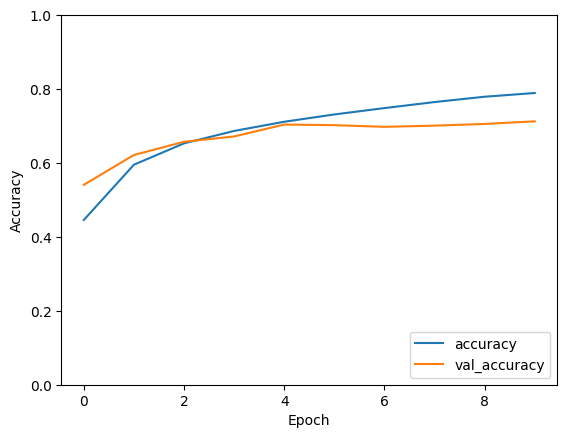

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.show()


In [8]:
model.save('cifar10_cnn_model.keras')

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc*100:.2f}%')


313/313 - 8s - loss: 0.8713 - accuracy: 0.7126 - 8s/epoch - 26ms/step
Test accuracy: 71.26%


313/313 [==============================] - 9s 27ms/step


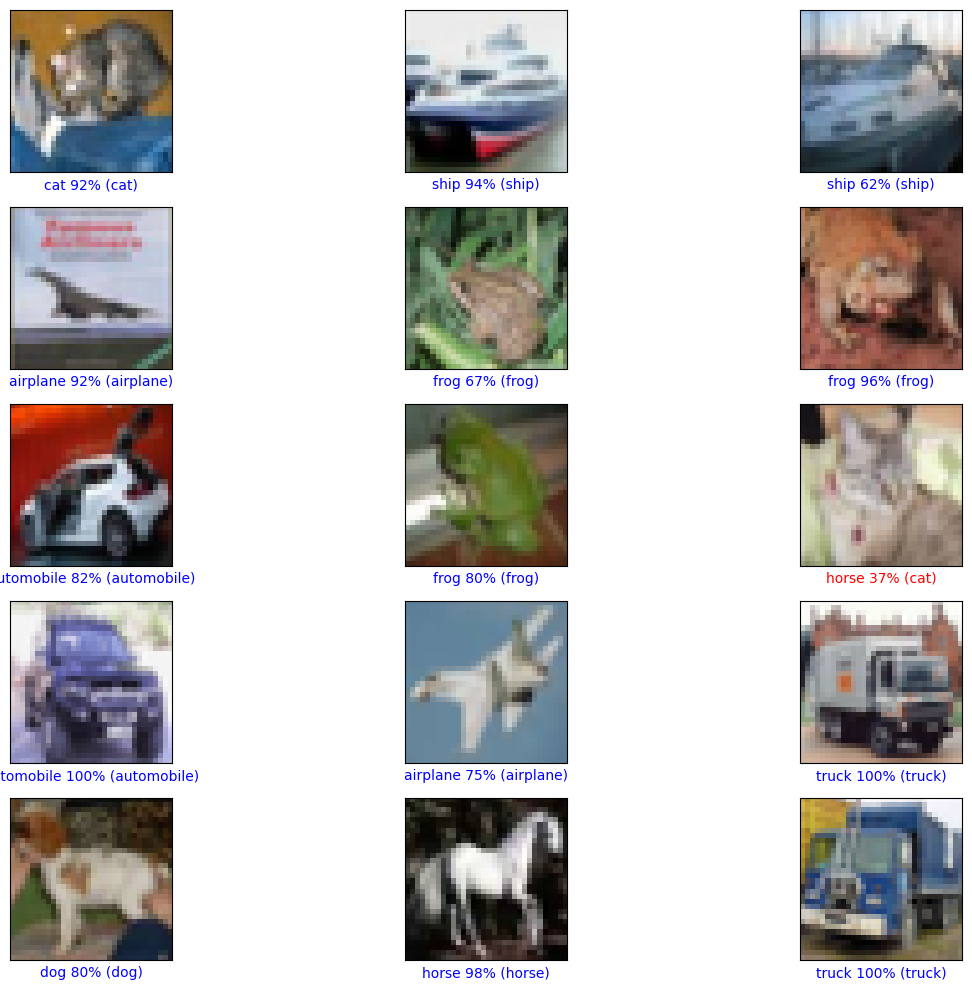

In [10]:
import matplotlib.pyplot as plt

# Make predictions
predictions = model.predict(x_test)

# Function to plot images, their predicted labels, and true labels
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == np.argmax(true_label):
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[np.argmax(true_label)]),
               color=color)

# Class names in CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Plot a few test images with predictions
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], y_test, x_test)
plt.tight_layout()
plt.show()


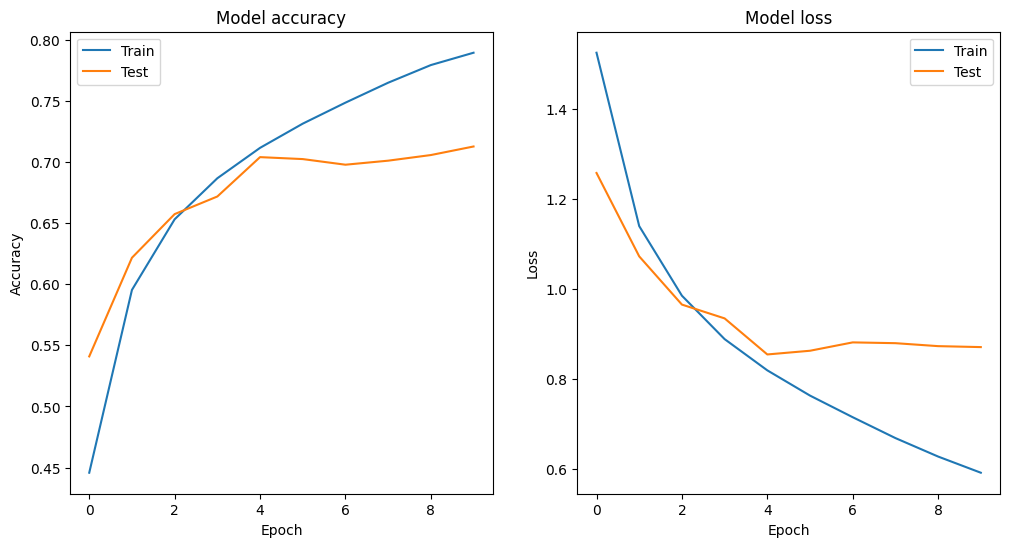

In [11]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()
